<a href="https://colab.research.google.com/github/therokitoki/AA2_TP_Alsop-Hachen-Nemeth/blob/main/Ejercicio%201/ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico AAII

Alumnos: Agustin Alsop, Rocio Hachen, Ulises Nemeth

## Ejercicio 1

### Descripción:
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

### Dataset:
El dataset proporcionado incluye las siguientes variables para cada estudiante:
Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
Además, el dataset incluye la variable objetivo:
Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

### Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.

In [48]:
import os
# Clonamos el repo completo para tener los datasets en el runtime
REPO_NAME = "AA2_TP_Alsop-Hachen-Nemeth"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/therokitoki/{REPO_NAME}.git
  os.chdir(REPO_NAME)

# Preparación del entorno

In [49]:
!pip install pandas
!pip install scikit-learn

# Librerias

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Carga de datos

In [51]:
dataset_1 = '/content/AA2_TP_Alsop-Hachen-Nemeth/datasets/Student_Performance.csv'
student_df = pd.read_csv(dataset_1)
student_df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [52]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Observamos que las variables cuantitativas están correctamente configuradas como **numéricas**.

# División de datos

In [53]:
X = student_df.drop('Performance Index', axis=1)
y = student_df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Cantidad de datos luego de la separación')
print(f'Train: {X_train.shape[0]} - 80%\n Test: {X_test.shape[0]} - 20%')

Cantidad de datos luego de la separación
Train: 8000 - 80%
 Test: 2000 - 20%


# Análisis exploratorio

- Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
- Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
- Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
- Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
- Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
- Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

In [54]:
print('Variables cuantitativas: ')
print(X_train.describe())
print('\nVariables cualitativas: ')
print(X_train['Extracurricular Activities'].describe())

Variables cuantitativas: 
       Hours Studied  Previous Scores  Sleep Hours  \
count    8000.000000      8000.000000  8000.000000   
mean        4.983250        69.531000     6.541625   
std         2.594862        17.343735     1.698493   
min         1.000000        40.000000     4.000000   
25%         3.000000        54.750000     5.000000   
50%         5.000000        70.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max         9.000000        99.000000     9.000000   

       Sample Question Papers Practiced  
count                       8000.000000  
mean                           4.616500  
std                            2.861241  
min                            0.000000  
25%                            2.000000  
50%                            5.000000  
75%                            7.000000  
max                            9.000000  

Variables cualitativas: 
count     8000
unique       2
top         No
freq      4043
Name: Extracurricular A

### Valores NaN y valores duplicados

In [55]:
na_values = X_train.isnull().sum()
print(f'Valores Nan:\n{na_values}')
if na_values.sum() == 0:
    print('\nNo se encontraron valores Nan')

print('\nFilas duplicadas:',X_train.duplicated().sum())

Valores Nan:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
dtype: int64

No se encontraron valores Nan

Filas duplicadas: 503


Si bien hay 503 filas duplicadas, decidimos no retirarlas del dataset, ya que podría haber dos alumnos con las mismas condiciones.

### Matriz de correlación

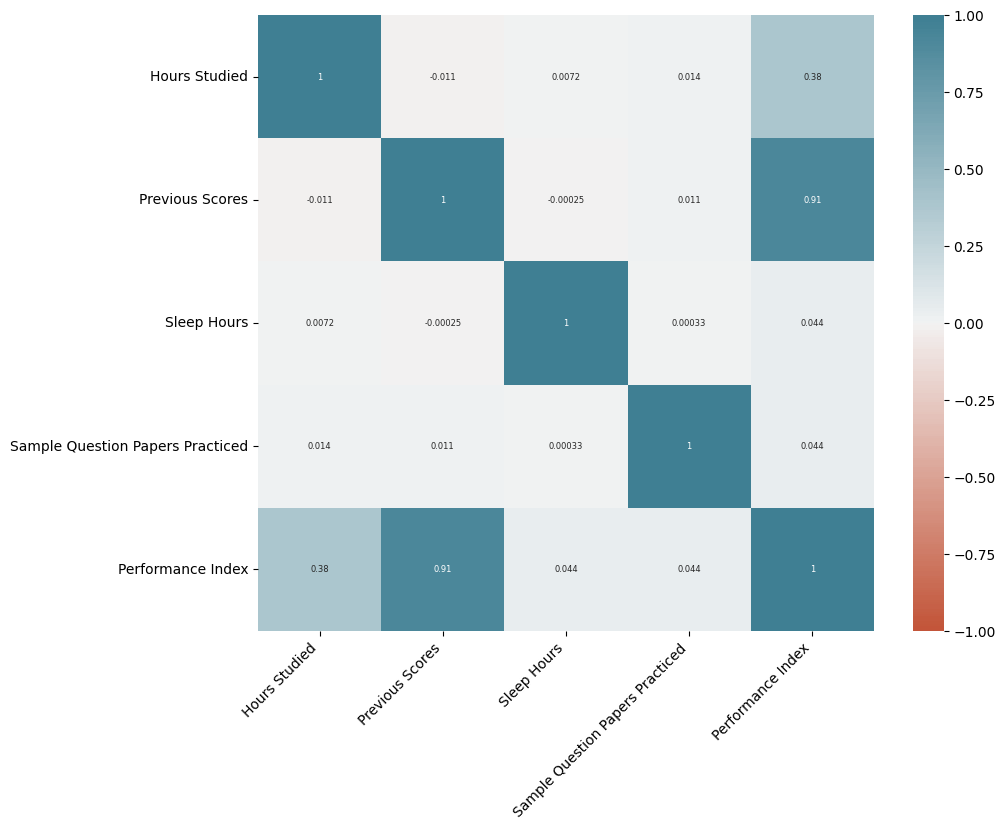

In [56]:
df_columns = pd.concat([X_train, y_train], axis=1)

df_columns_corr =pd.DataFrame(df_columns,columns=df_columns.drop(columns=['Extracurricular Activities']).columns)

plt.figure(figsize=(10,8))
corr = df_columns_corr.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Se incluyó la variable target en la matriz de correlación para poder observar su relación lineal con las distintas variables del dataset.

Observamos que las variables `Hours Studied` y `Previous Scores` tienen una relación alta linealmente con la variable de salida. Esto no es justificación suficiente para descartar de el resto de las variables, ya que las otras variables podrían tener una relacion no-lineal con la variable objetivo.

## Distribución de las variables

### Hours Studied ###
count    8000.000000
mean        4.983250
std         2.594862
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Hours Studied, dtype: float64 



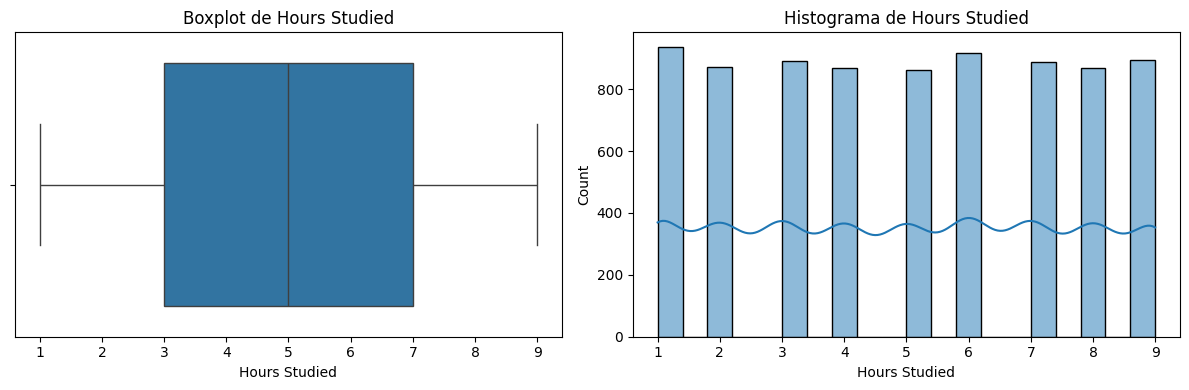







### Previous Scores ###
count    8000.000000
mean       69.531000
std        17.343735
min        40.000000
25%        54.750000
50%        70.000000
75%        85.000000
max        99.000000
Name: Previous Scores, dtype: float64 



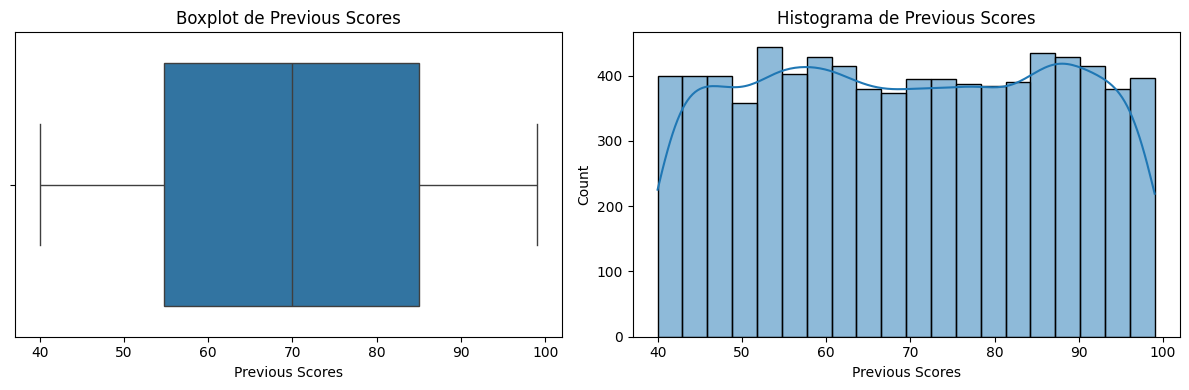







### Extracurricular Activities ###
count     8000
unique       2
top         No
freq      4043
Name: Extracurricular Activities, dtype: object 



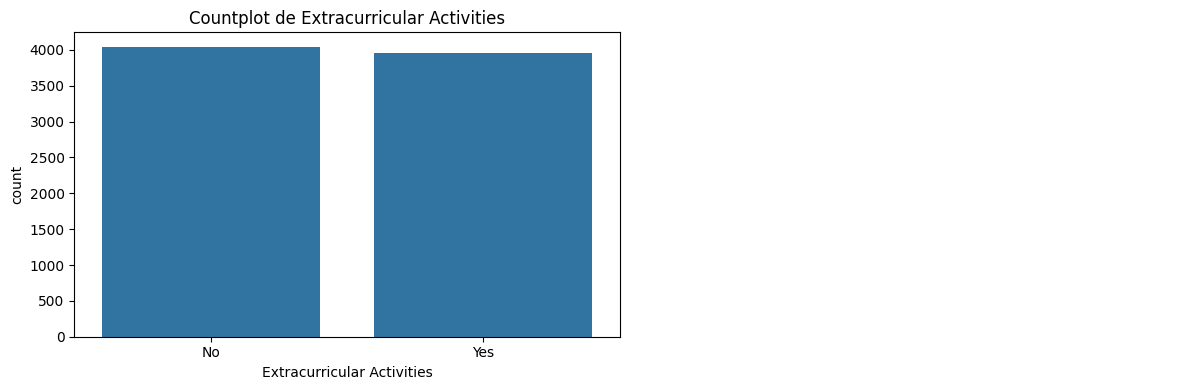







### Sleep Hours ###
count    8000.000000
mean        6.541625
std         1.698493
min         4.000000
25%         5.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: Sleep Hours, dtype: float64 



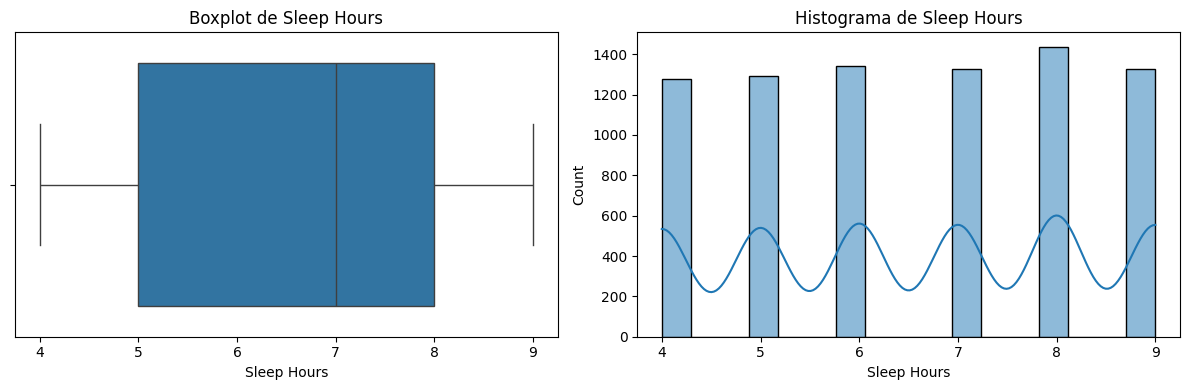







### Sample Question Papers Practiced ###
count    8000.000000
mean        4.616500
std         2.861241
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Sample Question Papers Practiced, dtype: float64 



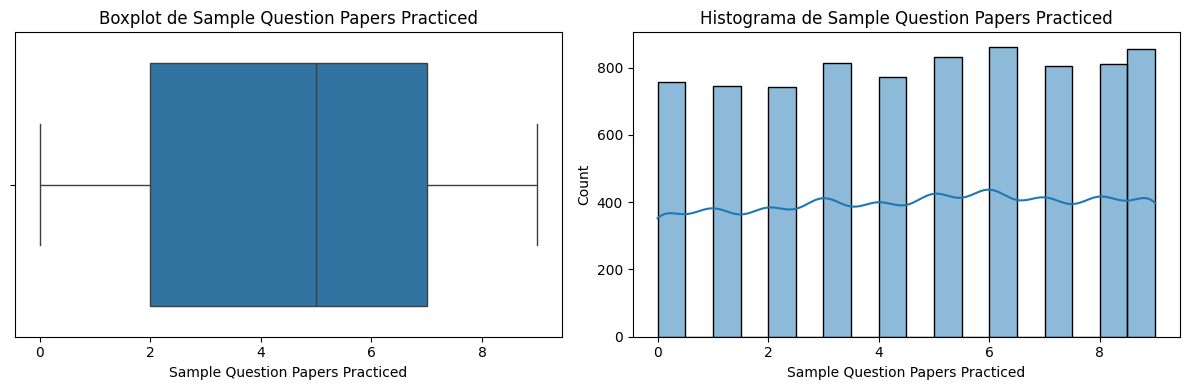







### Performance Index ###
count    8000.000000
mean       55.311500
std        19.202059
min        10.000000
25%        40.000000
50%        55.000000
75%        71.000000
max       100.000000
Name: Performance Index, dtype: float64 



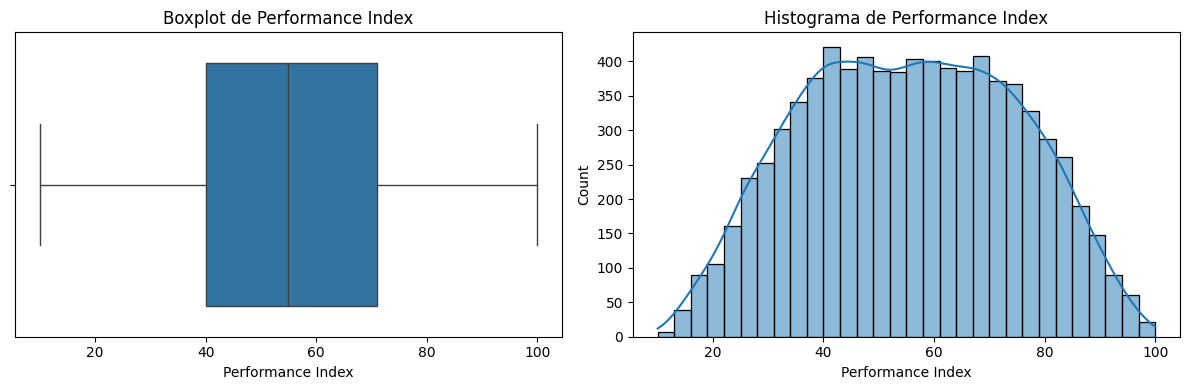

In [57]:
x_train_grafico=pd.DataFrame(df_columns,columns=df_columns.columns)

for columna in x_train_grafico:
    print(f'### {columna} ###')
    print(df_columns[columna].describe(), '\n')

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    if columna != 'Extracurricular Activities':
        sns.boxplot(data=df_columns, x=columna, ax=axs[0])
        axs[0].set_title(f'Boxplot de {columna}')
        sns.histplot(data=df_columns, x=columna, kde=True, ax=axs[1])
        axs[1].set_title(f'Histograma de {columna}')
    else:
        sns.countplot(data=df_columns, x=columna, ax=axs[0])
        axs[0].set_title(f'Countplot de {columna}')
        axs[1].axis('off')

    plt.tight_layout()
    plt.show()

    print('\n\n\n\n\n')

Al observar las distribuciones de las variables, concluimos:
- `Hours Studied, Previous Scores, Sleep Hours, Sample Question Papers Practiced` -> estas variables tienen una distribución uniforme.
- `Performance Index` -> presenta una distribución aproximadamente normal
- No se observan outliers
- La variable `Extracurricular Activities` se encuentra balanceada

## Escalado de datos

Como no se observan outliers, utilizaremos un escalador estandar.

In [58]:
columnas_scale = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columnas_scale] = scaler.fit_transform(X_train[columnas_scale])
X_test_scaled[columnas_scale] = scaler.transform(X_test[columnas_scale])

## Codificación de variables

In [59]:
X_train_scaled['Extracurricular Activities'] = X_train_scaled['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X_test_scaled['Extracurricular Activities'] = X_test_scaled['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Definición del modelo

In [60]:
histories = []


model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])


model.summary()

model.compile(optimizer='adam', loss='MeanSquaredError', metrics=['R2Score','RootMeanSquaredError'])

history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2)
histories.append(history)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - R2Score: -7.9092 - RootMeanSquaredError: 56.9974 - loss: 3249.4473 - val_R2Score: -5.5823 - val_RootMeanSquaredError: 49.3232 - val_loss: 2432.7747
Epoch 2/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - R2Score: -3.9266 - RootMeanSquaredError: 42.7791 - loss: 1845.3710 - val_R2Score: 0.1349 - val_RootMeanSquaredError: 17.8810 - val_loss: 319.7299
Epoch 3/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - R2Score: 0.4622 - RootMeanSquaredError: 13.9564 - loss: 197.1956 - val_R2Score: 0.7529 - val_RootMeanSquaredError: 9.5570 - val_loss: 91.3355
Epoch 4/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - R2Score: 0.7688 - RootMeanSquaredError: 9.1651 - loss: 84.0728 - val_R2Score: 0.8275 - val_RootMeanSquaredError: 7.9853 - val_loss: 63.7652
Epoch 5/25
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - R2Score: 0.8358 - RootMeanSquaredError: 7.7106 - loss: 59.4883 - val_R2Score: 0.8720 - val_RootMeanSquaredError: 6.8780 - val_loss: 47.3070
Epoch 6/25
20

In [61]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725 (2.84 KB)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 484 (1.89 KB)

# RMSE

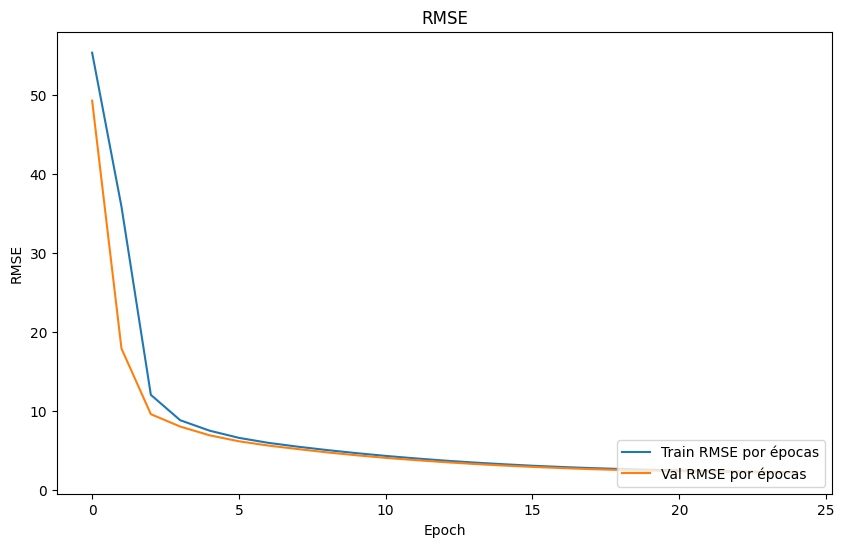

In [62]:
plt.figure(figsize=(10, 6))

for history in histories:
    plt.plot(history.history['RootMeanSquaredError'], label=f'Train RMSE por épocas')
    plt.plot(history.history['val_RootMeanSquaredError'], label=f'Val RMSE por épocas')

plt.title('RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend(loc='lower right')
plt.show()

Se observó una mejora progresiva tanto en el conjunto de entrenamiento como en el de validación.

En la primera época, el modelo presentaba un RMSE de 56.9974 en el conjunto de entrenamiento, mientras que en validación estos valores fue de 49.3232 (RMSE).

Al finalizar la época 25 el RMSE alcanzo un valor de 2.239 en entrenamiento, y un RMSE de 2.1304 en validación.

Esta tendencia paralela en la reducción del error demuestra la ausencia de overfitting, ya que el desempeño sobre los datos no vistos continuó mejorando junto con el de los datos de entrenamiento.

## Resultados

In [63]:
results = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test R2: {results[1]}")
print(f"Test RMSE: {results[2]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.9876 - RootMeanSquaredError: 2.1823 - loss: 4.7669
Test R2: 0.9875260591506958
Test RMSE: 2.1500370502471924


Luego de 4 épocas, el modelo ya era capaz de explicar aproximadamente el 82.75% de la varianza de la variable target en los datos de validación.

Al finalizar el entrenamiento, alcanzó una capacidad explicativa del 98.77%.

Cuando se considera que se deben predecir valores en un rango de entre 10 y 100 puntos de performance, obtener una raíz del error cuadrático medio (RMSE) de 2.15 indica un buen nivel de precisión en las predicciones, ya que representa un error del 3.6% con respecto a la media de la variable objetivo (55.31)